# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

In [1]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2023-09-14 01:48:15--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat’

notMNIST_small.mat  100%[===================>] 112.14M  47.7MB/s    in 2.4s    

2023-09-14 01:48:17 (47.7 MB/s) - ‘notMNIST_small.mat’ saved [117586976/117586976]



In [2]:
import matplotlib.pyplot as plt
from scipy import io
import numpy as np

## Data Loading

In [3]:
data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [4]:
x = data['images']
y = data['labels']

In [5]:
x.shape, y.shape

((28, 28, 18724), (18724,))

In [6]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape( (-1, resolution, resolution, 1) )

(18724, 28, 28)


In [7]:
# sample, x, y, channel
x.shape, y.shape

((18724, 28, 28, 1), (18724,))

* 데이터 살펴보기

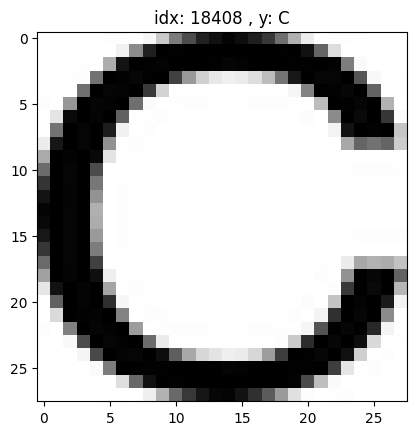

In [8]:
rand_i = np.random.randint(0, x.shape[0])

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='Greys' )
plt.show()

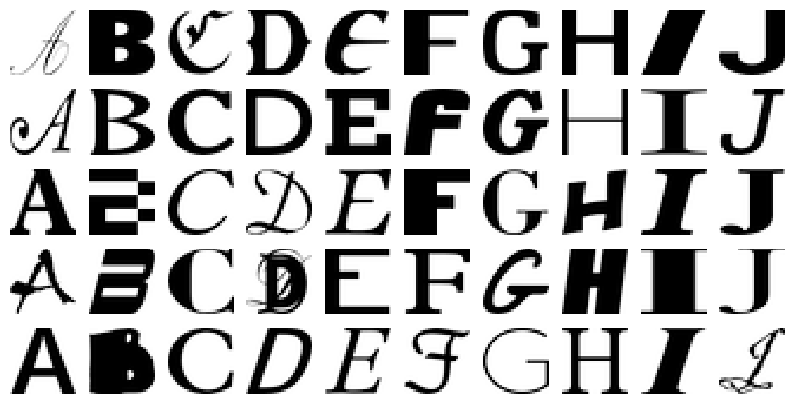

In [9]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='Greys', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split

    - training set : test set = 8 : 2
    - 재연을 위한 난수 고정 : 2023

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)
x_train.shape, y_train.shape

((14979, 28, 28, 1), (14979,))

* Scaling

    - min-max scaling

In [15]:
x_test.shape

(3745, 28, 28, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 데이터를 2D 배열로 변환
x_train = x_train.reshape(14979, -1)
x_test = x_test.reshape(3745, -1)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled = x_train_scaled.reshape(14979, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(3745, 28, 28, 1)
x_train_scaled.shape, x_test_scaled.shape

((14979, 28, 28, 1), (3745, 28, 28, 1))

* One-hot encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder


# OneHotEncoder 생성
encoder = OneHotEncoder(sparse=False)

# 데이터를 2D 배열로 변환
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1,1)
# 원핫 인코딩 적용
y_train_oh = encoder.fit_transform(y_train)
y_test_oh = encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from tensorflow.keras.utils import to_categorical



y_train = to_categorical(y_t)

In [31]:
# y_train_oh = y_train_oh.reshape(-1)
# y_test_oh = y_test_oh.reshape(-1)

* Data shape 재확인

In [34]:
x_train_scaled.shape, x_test_scaled.shape, y_train_oh.shape, y_test_oh.shape

((14979, 28, 28, 1), (3745, 28, 28, 1), (14979, 10), (3745, 10))

## Modeling
- 조건
    1. Sequential API, Functional API 중 택일
    2. Flatten Layer 사용할 것
    3. Activation Function이 주어진 Dense Layer 뒤에 BatchNormalization 사용할 것
    4. Dropout을 0.2 정도로 사용할 것
    5. Early Stopping을 사용할 것

In [41]:
import tensorflow as tf
from tensorflow import keras

In [43]:
## Functional API
# 1. 세션 클리어 : 메모리에 기존 모델 구조가 남아있으면 제거해 줘
keras.backend.clear_session()

# 2. 레이어 사슬처럼 엮기
X = keras.layers.Input(shape=(28,28,1))
H = keras.layers.Flatten()(X)
H = keras.layers.Dense(256, activation='relu')(H)
H = keras.layers.Dense(256, activation='relu')(H)
H = keras.layers.BatchNormalization()(H)
H = keras.layers.Dropout(0.2)(H)

H = keras.layers.Dense(128, activation='relu')(H)
H = keras.layers.Dense(128, activation='relu')(H)
H = keras.layers.BatchNormalization()(H)
H = keras.layers.Dropout(0.2)(H)

H = keras.layers.Dense(64, activation='relu')(H)
H = keras.layers.Dense(64, activation='relu')(H)
H = keras.layers.BatchNormalization()(H)
H = keras.layers.Dropout(0.2)(H)

Y = keras.layers.Dense(10, activation='softmax')(H)

# 3. 모델의 시작과 끝 지정
model = keras.models.Model(X,Y)

# 4. 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # keras.losses.categorical_crossentorpy
              metrics='accuracy',
              )

# 양념
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

In [35]:
import tensorflow as tf
X = tf.keras.Input(shape=[28, 28, 1])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(256, activation='swish')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.2)(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                           

* Early stopping

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', # 관측대상
                   min_delta=0, # threshold, 설정한 값보다 크게 변해야 성능 개선 간주
                   patience = 3, # 성능 개선이 이루어지지않을때 몇번 더 지켜볼지
                   verbose=1,
                   restore_best_weights=True # 가장 성능이 좋은 epoch 가중치
                   )

In [36]:
early = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

* .fit( )

In [49]:
model.fit(x_train_scaled, y_train_oh,
          epochs=1000000,
           callbacks=[es],
          verbose=1, validation_split=0.2,
          )

Epoch 1/1000000
375/375 [==============================] - 9s 16ms/step - loss: 0.8639 - accuracy: 0.7390 - val_loss: 0.5557 - val_accuracy: 0.8385
Epoch 2/1000000
375/375 [==============================] - 4s 11ms/step - loss: 0.4876 - accuracy: 0.8600 - val_loss: 0.3733 - val_accuracy: 0.8925
Epoch 3/1000000
375/375 [==============================] - 5s 14ms/step - loss: 0.4244 - accuracy: 0.8807 - val_loss: 0.3983 - val_accuracy: 0.8802
Epoch 4/1000000
375/375 [==============================] - 5s 13ms/step - loss: 0.3816 - accuracy: 0.8890 - val_loss: 0.3663 - val_accuracy: 0.8959
Epoch 5/1000000
375/375 [==============================] - 4s 11ms/step - loss: 0.3407 - accuracy: 0.9002 - val_loss: 0.3730 - val_accuracy: 0.8909
Epoch 6/1000000
375/375 [==============================] - 6s 15ms/step - loss: 0.3218 - accuracy: 0.9061 - val_loss: 0.4212 - val_accuracy: 0.8818
Epoch 7/1000000
375/375 [==============================] - 5s 13ms/step - loss: 0.3016 - accuracy: 0.9147 - val_

* .evaluate( )

In [50]:
model.evaluate(x_test_scaled, y_test_oh)

118/118 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.8945


[0.358140230178833, 0.8945260643959045]

* .predict( )

In [51]:
y_pred = model.predict(x_test_scaled)

118/118 [==============================] - 1s 5ms/step


In [52]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(y_test_oh, axis=1)

In [53]:
y_pred_arg.shape

(3745,)

* 평가 지표

In [54]:
from sklearn.metrics import accuracy_score, classification_report

In [55]:
accuracy_score(test_y_arg, y_pred_arg)

0.8945260347129506

In [56]:
print(classification_report(test_y_arg, y_pred_arg))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       357
           1       0.93      0.85      0.89       365
           2       0.94      0.90      0.92       374
           3       0.81      0.93      0.87       392
           4       0.95      0.84      0.89       406
           5       0.95      0.92      0.93       377
           6       0.91      0.91      0.91       372
           7       0.88      0.91      0.89       374
           8       0.89      0.84      0.86       385
           9       0.80      0.94      0.87       343

    accuracy                           0.89      3745
   macro avg       0.90      0.90      0.90      3745
weighted avg       0.90      0.89      0.90      3745



## Visualization

* 실제 데이터 확인

idx = 1541
해당 인덱스의 이미지는 J
모델의 예측 : J
모델의 클래스별 확률 : 
-------------------
A 0.0
B 0.0
C 0.0
D 0.0
E 0.0
F 0.0
G 0.0
H 0.0
I 0.0
J 99.0
정답


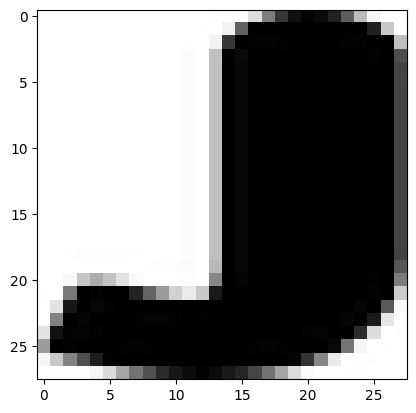

In [59]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(x_test_scaled[rand_idx], cmap='Greys')
plt.show()

* 틀린 이미지만 확인해보기

In [60]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

395

idx = 1776
해당 인덱스의 이미지는 E
모델의 예측 : I
모델의 클래스별 확률 : 
-------------------
A 3.0
B 4.0
C 1.0
D 5.0
E 4.0
F 8.0
G 4.0
H 11.0
I 44.0
J 10.0
땡


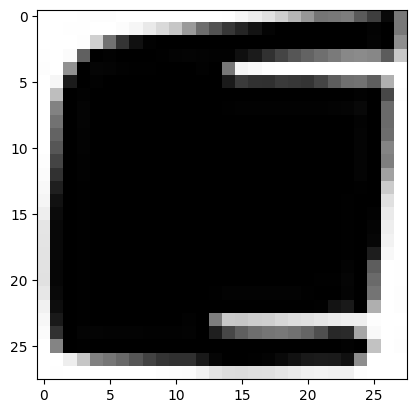

In [62]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(x_test_scaled[rand_idx], cmap='Greys')
plt.show()